# Complexity Analysis: an introduction using `List` data structure

Complexity analysis helps us understand how the performance of an algorithm or data structure changes as the input size increases.

**A slightly formal definition of complexity**

Let's $F(x_n)$ be an algorithm which take $x_n$ as an input. $x_n$ can be a primitive data structure or nonprimitive one such as Tuple, List, .... We assume that the size of $x_n$ is equal to $n$.

Let's also consider that we have a function $\varphi$ which is a metric of the performance of the algorithm $F$. This performance can be measured in terms of execution time or disk space occupied, for example.

The complexity $\gamma$ of the algorithm $F$ represents how the metric $\varphi$ evolves as the size $n$ of the input $x_n$ tends towards infinity ($\infty$):

$$
\gamma = \lim_{n\to\infty} \varphi(F(x_n))
$$

* If $\varphi$ remains `constant` as $n$ increases, we have `constant complexity`. The complexity $\gamma$ is then noted as follows: $O(1)$: this is the `Big O notation`.

$$
\gamma = O(1)
$$

* If $\varphi$ increases `linearly` as $n$ increases, we say we have `linear complexity`. 

$$
\gamma = O(n)
$$

**Note: there are several types of complexity, which we'll examine later with the help of a few case studies.**


$$
\gamma = O(log \; n), \gamma = O(n \; log \; n), \gamma = O(n^2), ...
$$


## 1.  Time Complexity Overview

`Time complexity` refers to the amount of time taken by an algorithm or operation to execute as a function of the input size. It helps us evaluate the efficiency of different algorithms and data structures.

Time complexity can be analyzed when we do the following operations:

* **Access an element**
* **Insert an element**
* **Delete an element**
* **Search for an element**
* **Slicing (for lists, tuples, ...)**


### 1.1. Accessing an element in a List by index

<img src="./images/lists_access.png" width="350" />

Lists provide random access. It means that elements can be accessed in arbitrary order. In concrete terms, to access the element at index `i`, it is not necessary to access the previous elements (`0` to `i - 1`) first.

Thus, the access speed to an element does not depend on its position (nor on the size of the list). In terms of time complexity, accessing an element in a list is equal to $O(1)$.

#### **Create a function to measure the time complexity of accessing an element**

##### **What is a function in Python?**

A `function` in Python is a reusable block of code that performs a specific task. It can take `input arguments`, performs some operations, and `optionally` returns a result.

In [ ]:
# function structure
"""
def function_name(argument1, argument2, ...):
    # Function body
    # Code statements
    # Return statement (optional)
"""

* `def`: is the keyword used to define a function

* `function_name` is the name you choose for your function. It should follow Python's naming conventions (lowercase with underscores between words).

* `argument1, argument2, etc.`, are the input arguments (also called parameters) that the function can accept. These are optional, and you can have any number of arguments.

* The colon (`:`) at the end of the first line indicates the start of the function body.

* The `function body` consists of one or more indented code statements that define what the function does.

* Optionally, a function can have a `return` statement that specifies the value to be returned when the function is called.

##### **Our function to measure time complexity for accessing**

In [ ]:
# install matplotlib
%pip install matplotlib

In [38]:
# import
import time
import matplotlib.pyplot as plt

def measure_time_complexity_of_accessing():
    # step 1: create a list to contain the runtime (time of execution)
    # for each size of the list
    runtime_list = []

    # create also a list to store the evolution of the size of the list
    store_size_list = []

    # step 2: create a list with size `list_size`
    # as we want to measure the runtime while `list_size` increases
    # we will make a loop

    # 1. define the initial size of our list
    start_size = 1

    # 2. define the max_size (infinity size) for our list
    end_size = 10000  # for big number, you can use this notation 100_000 (easy to read)

    # 3. define the step between two list size
    step_size = 1_000

    for list_size in range(start_size, end_size, step_size):
        # list_size will take successively the following values:
        # start_size, start_size + step_size, start_size + 2 * step_size, ...
        # for each `list_size`, we will execute the code below

        # 1. generate our list
        # range(N) generates an ordered sequence of integer numbers from 0 to N - 1, step=1
        # list(range(N)): converts (or casts) this `range` sequence to a list (sequence)
        input_list = list(range(list_size))

        # 2. start measure time
        # for that we will use a built-in function `time` from `time` library
        # first import this library (see above)
        start_time = time.time()  # execute time() function from library `time`, it returns current time

        # 3. access an element (let's say the middle one in the list)
        # first compute the index of the middle element
        # input_list index go from 0 to list_size - 1,
        # so the middle index is: ((list_size - 1) - 0 + 1) // 2 = list_size // 2
        idx_middle = list_size // 2

        # now access
        elem_list = input_list[idx_middle]

        # 4. end measuring time
        end_time = time.time()

        # 5. compute the elapsed time between `start_time` and `end_time` (in seconds)
        runtime = end_time - start_time

        # 6. round the time to 2 decimals
        runtime = round(runtime, 2)

        # 7. add this runtime to the end of our list `runtime_list`
        runtime_list.append(runtime)

        # add also the size of the current list to `store_size_list`
        store_size_list.append(list_size)
    
    # step 3: after the loop, display a graph of runtime as a function of list size
    # for that, we will a library called matplotlib. You need to install matplotlib
    # see above for how to install. To install, type: %pip install matplotlib
    # once installation is completed, import matplotlib.pyplot and give an alias: plt
    
    # custom our plot (plot size, font, font size)
    plt.figure(figsize=(6, 4))
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 9

    # plot
    plt.plot(store_size_list, runtime_list)
    plt.xlabel('List size')
    plt.ylabel('Runtime (seconds)')
    plt.title("Evolution of runtime with increase in list's size (accessing)")

    # show the plot
    plt.show()


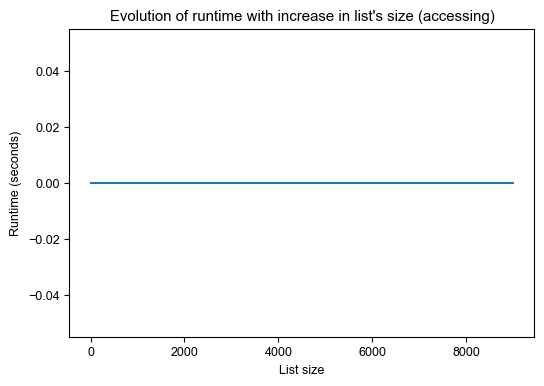

In [39]:
# now, let's execute our function
measure_time_complexity_of_accessing()

### 1.2. Inserting or deleting an element at the **beginning** of a list

<img src="./images/lists_insert_beginning.png" width="400" />

Inserting a new element at the beginning of a list creates `new disk space` and `consecutively` moves each element in the list to the `right`.

If the list has an initial size of `n`, inserting an element results in `n` moves, and the new list has a size of `n + 1`. If we insert another element, we'll have `n + 1` moves, and the new list will have `n + 2` elements.

Thus, as the size of the list increases, the number of moves increases linearly. Time complexity is therefore linear: $O(n)$.

### 1.3. Deleting an element at the **beginning** of a list

<img src="./images/lists_delete_beginning.png" width="400" />

Deleting an element at the beginning of a list remove a `disk space` but `consecutively` moves each element in the list to the `left`.

If the list has an initial size of `n`, deleting an element results in `n - 1` moves, and the new list has a size of `n - 1`. If we delete another element, we'll have `n - 2` moves, and the new list will have `n - 2` elements. However, when `N` tends towards infinity, `n - constant` tends towards `n`.

Thus, as the size of the list increases, the number of moves increases linearly. Time complexity is therefore linear: $O(n)$.

### 1.4. Inserting or deleting an element at the **end** of a List

* **Insertion**

Inserting an element at the end of a list creates a new disk space, but does not move any pre-existing elements. Thus, the time complexity of inserting an element at the end of a list is $O(1)$.

* **Deletion**

Deleting an element at the end of a list removes a disk space, but does not move any pre-existing elements. Thus, the time complexity of deleting an element at the end of a list is $O(1)$.


### 1.5. Inserting or deleting an element in the **middle**

Following the rationale of sections `1.2` and `1.3`, the time complexity of inserting or deleting an element in the middle (i.e., any element at index $[1, \; N - 2]$) of a list is: $O(n)$ because $K$ elements are successively moved to the `left` (for deletion) or `right` (for insertion) in a linear fashion as the size $N$ of the list increases.

## 2.  Amortized Time Complexity

<img src="./images/lists_amprtized_complexity.png" width="800" />


**List dynamics work as follows:**

A list has a `size` (number of cells containing a `non-None` value) and a `capacity` (number of available cells). When an element is inserted at the end of the list (`append`), if the `size` is less than the `capacity`, the element is inserted normally and the time complexity is $O(1)$.

However, when the `size` is equal to the `capacity`, there's no more cell for insertion. At this point, we double the list's previous `capacity`: this is called `resizing`.

Once `resizing` is complete, all the elements of the old list are copied consecutively to the same locations in the new `list`, and the element we want to insert is then added after the last copied element.

Copying the $N$ elements of the previous `list` and inserting a new element leads to complexity $O(N + 1) = O(N)$ as $N$ increases towards infinity. **Note that $O(kN + b) = O(N)$ where $k$ and $b$ are constants.**

* **Amortized complexity**

However, as the `resizing` operation is performed `less frequently` (only when capacity is reached), we consider the number of resizing operations to be `negligible` compared to the number of times an insertion is performed without `resizing`.

Thus, the complexity that consists in neglecting the complexity of `resizing`, because it is rarely performed, is called `amortized complexity`. In this case, the insertion at the end of the list has an amortized time complexity $O(1)$. It is exactly this amortized complexity that we analyzed in `section 1.4`.



## 3.  Space Complexity

The space complexity of a list refers to the amount of memory required to store the elements.

* **At creation**

When creating a list, the space complexity is typically $O(n)$, where $n$ is the number of elements stored. This is because `lists` need to allocate memory for each element, as well as some additional memory for bookkeeping purposes.
